## 4-2. 스크래핑 결과 시각화하기 I - 해시코드 질문태그 빈도 시각화

- bs4와 Seaborn을 이용해서 질문의 주제 빈도를 보여주는 시각화를 진행해봅시다.

### Target: 해시코드 질문 태그의 빈도 확인

이전에 진행한 해시코드(https://hashcode.co.kr) 사이트에선 다양한 질문이 올라왔는데,  
질문제목 아래에 "태그"가 있었습니다.

이 태그의 빈도를 측정하면 어떤 주제의 질문이 많이 올라오는지 알 수 있을 것 같습니다.  
이를 스크래핑 후 시각화해봅시다.

In [2]:
# 다음 User-Agent를 추가해봅시다.
# What is my User Agent?
# https://www.whatismybrowser.com/detect/what-is-my-user-agent/

user_agent = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/140.0.0.0 Safari/537.36"}

In [ ]:
# 필요한 라이브러리를 불러온 후, 요청을 진행해봅시다.

import time

frequency = {}

import requests
from bs4 import BeautifulSoup

for i in range(1, 3):
    res = requests.get("https://quotes.toscrape.com/page/{}/".format(i), user_agent)
    soup = BeautifulSoup(res.text, "html.parser")

    # 1. class='quote' 인 div 가져오기
    # 2. 1번 안에 있는 class='tags' 인 div 가져오기
    # 3. 2번 안에 있는 class='tag' 인 a 의 text 가져오기

    quotes = soup.find_all("div", "quote")
    for q in quotes:
        for t in q.find_all("div", "tags"):
            for a in t.find_all('a', 'tag'):
                tag = a.text
                if tag not in frequency:
                    frequency[tag] = 1
                else:
                    frequency[tag] += 1
    time.sleep(0.5)

print(frequency)
            

{'change': 1, 'deep-thoughts': 1, 'thinking': 1, 'world': 1, 'abilities': 1, 'choices': 1, 'inspirational': 5, 'life': 6, 'live': 1, 'miracle': 1, 'miracles': 1, 'aliteracy': 1, 'books': 2, 'classic': 1, 'humor': 2, 'be-yourself': 1, 'adulthood': 1, 'success': 1, 'value': 1, 'love': 5, 'edison': 1, 'failure': 1, 'paraphrased': 1, 'misattributed-eleanor-roosevelt': 1, 'obvious': 1, 'simile': 1, 'friends': 3, 'heartbreak': 1, 'sisters': 1, 'courage': 1, 'simplicity': 1, 'understand': 1, 'fantasy': 1, 'navigation': 1, 'activism': 1, 'apathy': 1, 'hate': 1, 'indifference': 1, 'opposite': 1, 'philosophy': 1, 'friendship': 2, 'lack-of-friendship': 1, 'lack-of-love': 1, 'marriage': 1, 'unhappy-marriage': 1, 'contentment': 1, 'fate': 1, 'misattributed-john-lennon': 1, 'planning': 1, 'plans': 1}


In [12]:
# Counter를 사용해 가장 빈도가 높은 value들을 추출합니다.

from collections import Counter

counter = Counter(frequency)
counter.most_common(5)

[('life', 6), ('inspirational', 5), ('love', 5), ('friends', 3), ('books', 2)]

<Axes: >

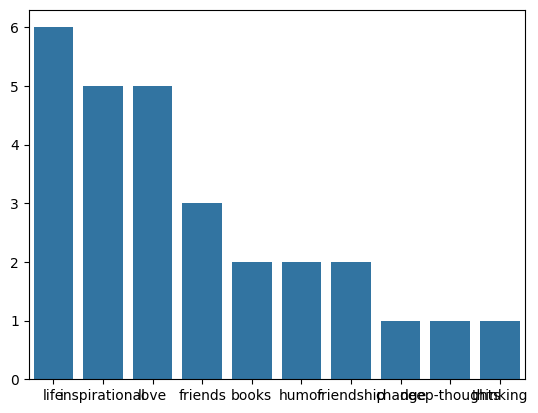

In [13]:
# Seaborn을 이용해 이를 Barplot으로 그립니다.

import seaborn as sns

x = [elem[0] for elem in counter.most_common(10)]
y = [elem[1] for elem in counter.most_common(10)]

sns.barplot(x=x, y=y)

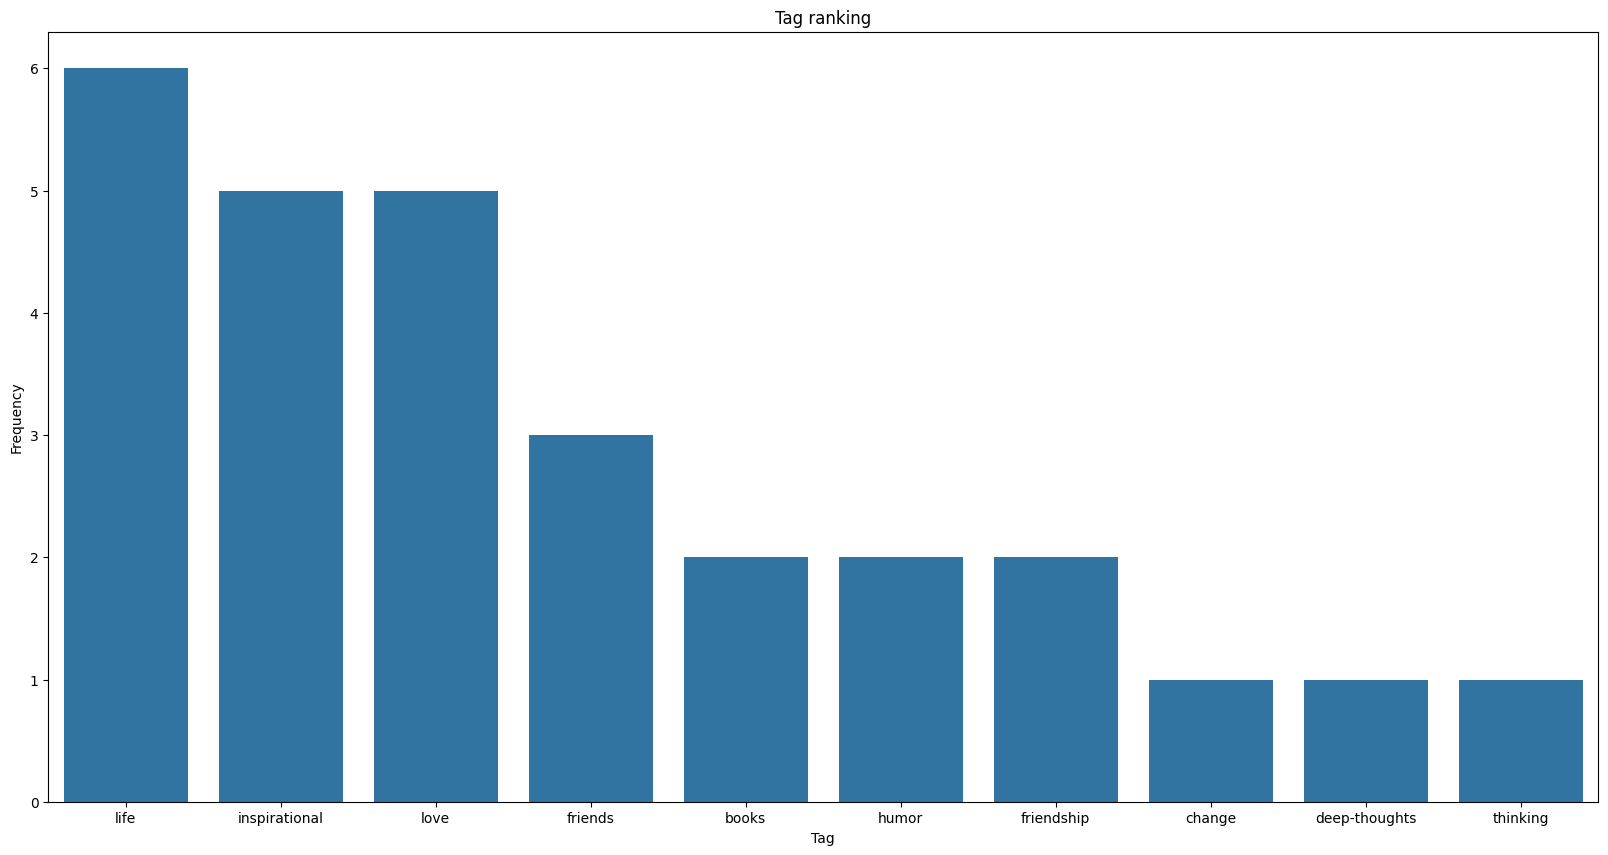

In [15]:
# figure, xlabel, ylabel, title을 적절하게 설정해서 시각화를 완성해봅시다.

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.title("Tag ranking")
plt.xlabel("Tag")
plt.ylabel("Frequency")

sns.barplot(x=x, y=y)

plt.show()